<a href="https://colab.research.google.com/github/Emrekorkmz0/flower_classification/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import os
import random
import warnings
warnings.filterwarnings('ignore')

pre-proccessing of images

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Target Directory
directory_train = "/content/drive/MyDrive/ALL_COLAB_FİLES/train"
directory_val="/content/drive/MyDrive/ALL_COLAB_FİLES/validation"

# Train Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
             directory_train,
             subset='training',
             validation_split=0.2,
             image_size=IMAGE_SIZE,
             batch_size=BATCH_SIZE,
             seed=42)

# Valid data
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
            directory_val,
            subset='validation',
            validation_split=0.2,
            image_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,
             seed=42)

Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 318 files belonging to 5 classes.
Using 63 files for validation.


In [ ]:
class_names = train_data.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

Label-encoding to 0-1-2..

In [ ]:
label_encoder=LabelEncoder()
label_encoder=label_encoder.fit_transform(class_names)

label_encoder




array([0, 1, 2, 3, 4])

In [ ]:
def preproces_img(img,label,img_shape=224):
  img=tf.image.resize(img,[img_shape,img_shape])
  img=img/255.0
  #converting float cause of 255.0
  return tf.cast(img,tf.float32),label


In [ ]:
img=plt.imread('/content/drive/MyDrive/ALL_COLAB_FİLES/train/daisy/10140303196_b88d3d6cec.jpg')
preproces_img(img=img,label='daisy')

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.8336642 , 0.8462414 , 0.8768349 ],
         [0.8130432 , 0.8363275 , 0.8610474 ],
         [0.81818527, 0.8262249 , 0.8556529 ],
         ...,
         [0.02468568, 0.02980508, 0.04505105],
         [0.03877311, 0.03104823, 0.05065607],
         [0.03004489, 0.02913463, 0.04723682]],
 
        [[0.84418017, 0.86318386, 0.8915321 ],
         [0.8521515 , 0.8675061 , 0.89420843],
         [0.84848404, 0.84822947, 0.87998396],
         ...,
         [0.041245  , 0.04124972, 0.05832786],
         [0.04998644, 0.04472099, 0.06432883],
         [0.03034358, 0.03231301, 0.04897535]],
 
        [[0.8524637 , 0.86006045, 0.88842577],
         [0.8526117 , 0.8520873 , 0.8834376 ],
         [0.87316114, 0.88484704, 0.9123243 ],
         ...,
         [0.02721254, 0.02360819, 0.04227071],
         [0.01533367, 0.01920272, 0.03881056],
         [0.02448821, 0.02840978, 0.04409605]],
 
        ...,
 
        [[0.79265946, 0.81678414

In [ ]:
# map the preprocess_image to train_data
train_data = train_data.map(map_func=preproces_img, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
train_data = train_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# map the preprocess_image to valid_data
valid_data = valid_data.map(map_func=preproces_img, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
valid_data = valid_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, valid_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

creating model

In [ ]:
tf.random.set_seed(42)


model = Sequential([
    Conv2D(filters=32, kernel_size=4, padding='same', activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(len(label_encoder), activation='softmax')
])

# Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

# Fit
history = model.fit(train_data,
                       epochs=10,
                       validation_data=valid_data)



Epoch 1/10
69/69 [==============================] - 266s 227ms/step - loss: 1.4090 - accuracy: 0.3660 - val_loss: 1.0856 - val_accuracy: 0.5238
Epoch 2/10
69/69 [==============================] - 17s 87ms/step - loss: 1.1457 - accuracy: 0.5280 - val_loss: 0.8673 - val_accuracy: 0.6667
Epoch 3/10
69/69 [==============================] - 15s 85ms/step - loss: 0.9844 - accuracy: 0.6204 - val_loss: 0.6384 - val_accuracy: 0.7619
Epoch 4/10
69/69 [==============================] - 14s 86ms/step - loss: 0.8283 - accuracy: 0.6818 - val_loss: 0.5225 - val_accuracy: 0.8254
Epoch 5/10
69/69 [==============================] - 15s 91ms/step - loss: 0.6465 - accuracy: 0.7729 - val_loss: 0.4869 - val_accuracy: 0.8730
Epoch 6/10
69/69 [==============================] - 20s 86ms/step - loss: 0.5353 - accuracy: 0.8066 - val_loss: 0.3920 - val_accuracy: 0.8571
Epoch 7/10
69/69 [==============================] - 14s 91ms/step - loss: 0.3669 - accuracy: 0.8653 - val_loss: 0.3211 - val_accuracy: 0.9206
Epoc

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

drawing the graph of accuracy and loss

In [ ]:
def plot_loss_graph(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accur=history.history['accuracy']
  val_accur=history.history['val_accuracy']

  plt.plot(loss,label='train_Loss')
  plt.plot(val_loss,label='val_Loss')

  epochs=range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accur, label='training_accuracy')
  plt.plot(epochs, val_accur, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

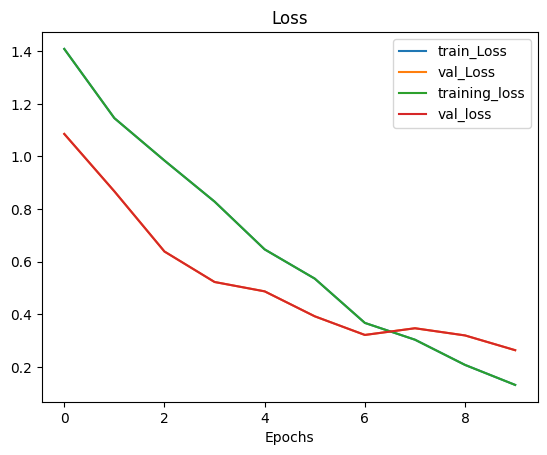

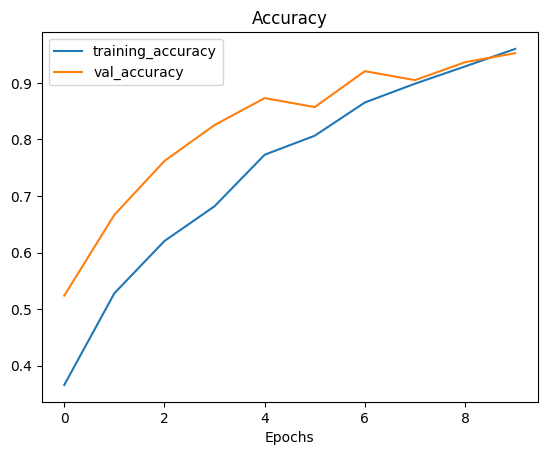

In [ ]:
plot_loss_graph(history)

Transfer Learning


In [ ]:
# Download Inception V3 model
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(include_top=False)

# Freeze the layers
base_model_inception.trainable=False

# Inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# Scaling the values
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Pass inputs to our base_model
x = base_model_inception(inputs,training=False)

# GlobalAveragePooling2D
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# outputs
outputs = tf.keras.layers.Dense(len(label_encoder), activation='softmax')(x)

# Build model
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 21813029 (83.21 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=7,
                       validation_data=valid_data)

Epoch 1/7
69/69 [==============================] - 28s 177ms/step - loss: 0.8048 - accuracy: 0.6905 - val_loss: 0.3986 - val_accuracy: 0.8730
Epoch 2/7
69/69 [==============================] - 13s 80ms/step - loss: 0.4404 - accuracy: 0.8462 - val_loss: 0.2629 - val_accuracy: 0.9841
Epoch 3/7
69/69 [==============================] - 17s 85ms/step - loss: 0.3505 - accuracy: 0.8817 - val_loss: 0.2699 - val_accuracy: 0.9365
Epoch 4/7
69/69 [==============================] - 15s 74ms/step - loss: 0.2931 - accuracy: 0.9044 - val_loss: 0.2188 - val_accuracy: 0.9683
Epoch 5/7
69/69 [==============================] - 14s 73ms/step - loss: 0.2474 - accuracy: 0.9267 - val_loss: 0.2153 - val_accuracy: 0.9683
Epoch 6/7
69/69 [==============================] - 14s 74ms/step - loss: 0.2167 - accuracy: 0.9390 - val_loss: 0.1713 - val_accuracy: 0.9841
Epoch 7/7
69/69 [==============================] - 14s 75ms/step - loss: 0.1961 - accuracy: 0.9422 - val_loss: 0.1769 - val_accuracy: 0.9683


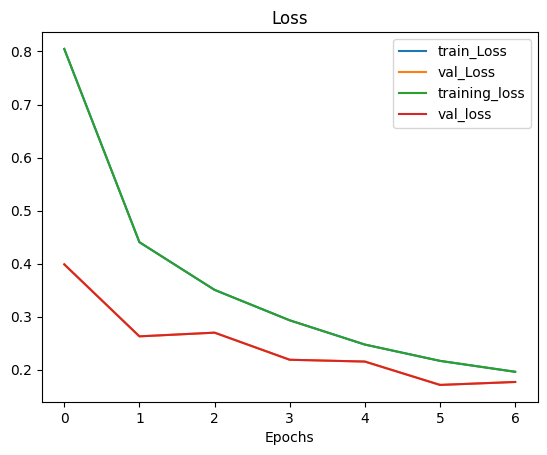

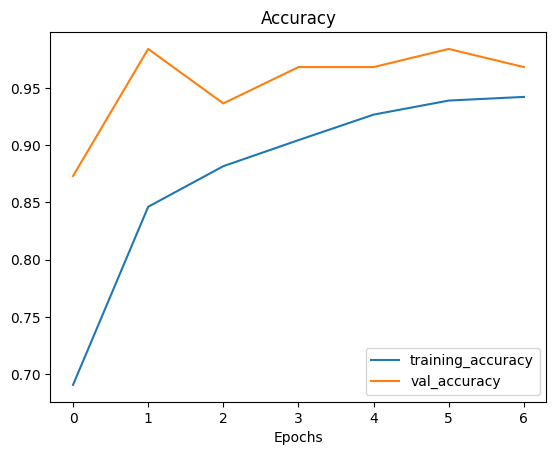

In [ ]:
plot_loss_graph(history_2)